<a href="https://colab.research.google.com/github/Ankur099IIT/Sequences-Time-Series-and-Prediction-Course-4--deeplearning.ai/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# utility function to visualize the series
def plot_series(time, series, format = '-', start = 0, end = None):
  plt.figure(figsize = (10,6))

  plt.plot(time[start:end], series[start:end], format)

  plt.xlabel('Time')
  plt.ylabel('Values')
  plt.grid(True)
  plt.show()

In [4]:
def trend(time, slope=0):


  series = slope*time
  return series

def seasonal_pattern(season_time):

  data_pattern = np.where(season_time < 0.4, np.cos(season_time*2*np.pi), 1/np.exp(3*season_time))

  return data_pattern

def seasonality(time, period, amplitude=1, phase=0):

  season_time = ((time+phase)%period)/period

  data_pattern = amplitude*seasonal_pattern(season_time)

  return data_pattern

def noise(time, noise_level=1, seed= None):

  rnd = np.random.RandomState(seed)

  noise = rnd.randn(len(time)) * noise_level

  return noise



In [5]:
# Parameters

time = np.arange(4*365+1, dtype = 'float32')
baseline = 10
amplitude = 40
slope = 0.05
noise_level= 5

In [6]:
# Create a series

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude = amplitude)

In [7]:
# Adding noise to the series
series = series + noise(time, noise_level, seed = 42)



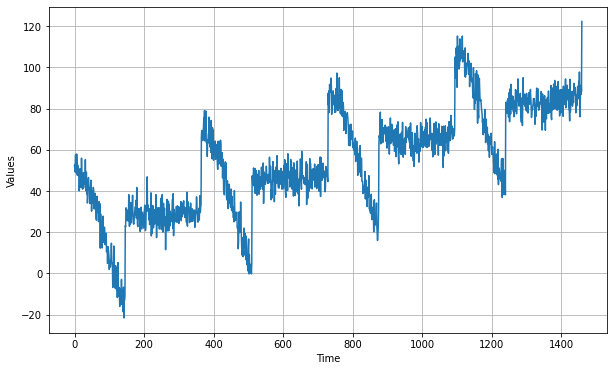

In [8]:
plot_series(time, series)

In [9]:
# Split the dataset

split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]



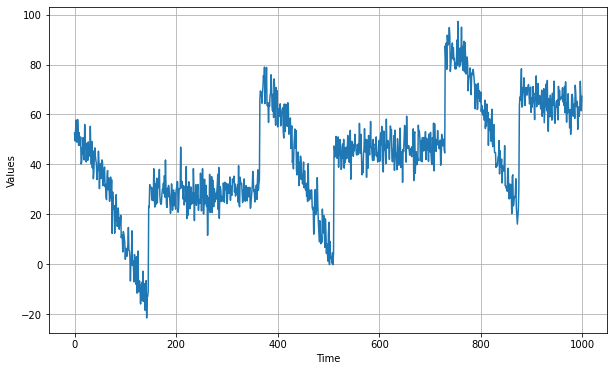

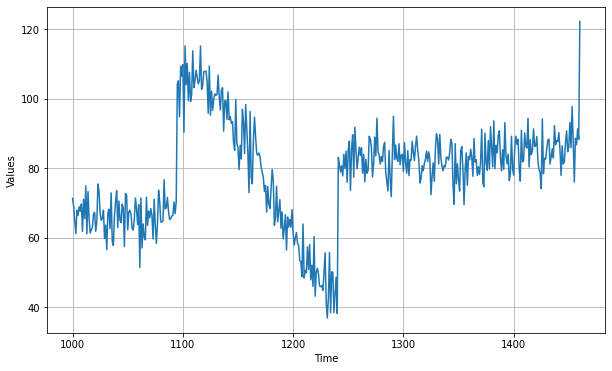

In [11]:
plot_series(time_train, x_train),

plot_series(time_valid, x_valid)

In [16]:
naive_forecast = series[split_time-1:-1] # naive forecast is shifted by 1 time step in the left

time_step = 100

print(f'ground truth at timestep {time_step}: {x_valid[time_step]}')
print(f'prediction at timestep {time_step + 1}: {naive_forecast[time_step+1]}')

ground truth at timestep 100: 109.84197926023576
prediction at timestep 101: 109.84197926023576


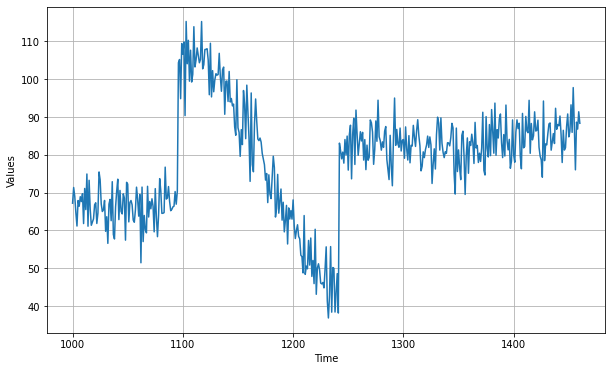

In [17]:
naive_forecast = series[split_time-1:-1]

plot_series(time_valid, naive_forecast)

In [22]:
time_valid.shape, x_valid.shape, naive_forecast.shape

((461,), (461,), (461,))

In [28]:
# Computing metrics

print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast). numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827533119763885
5.937908311029847


In [51]:
# moving average

def moving_average_forecast(series, window_size):

  forecast = []


  for item in range(len(series)- window_size):
    forecast.append(series[item:item + window_size].mean())

  forecast = np.array(forecast)

  return forecast





In [52]:
len(series)

1461

In [59]:
forecast = moving_average_forecast(series, 30)[split_time-30:]


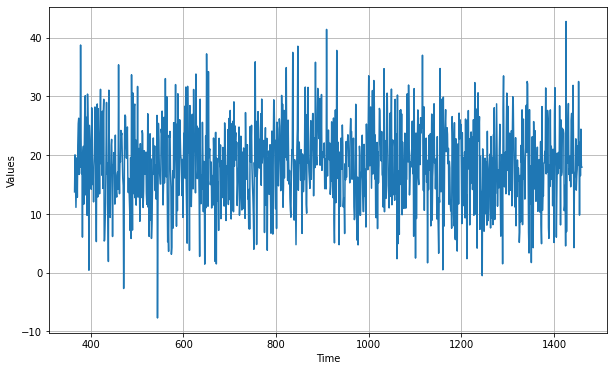

In [62]:
diff_series = (series[365:]- series[:-365])

diff_time = time[365:]

plot_series(diff_time, diff_series)